# Workshop 1.2 `<catchy title>`

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/)*

*Written by: Ronald Brinkgeve, Anna Störiko*

*Due: `<day of week>`, `<month>` `<day>`, `<year>`.*

## Part 1 Numerical Integration of Gumbel distribution

Variations in stochastic parameter values can be defined by means of a distribution function, or Probability Density Function (PDF). A PDF describes the probability that a parameter has a certain value x. The most well-known PDFs are the Uniform distribution and the Normal (or Gaussian) distribution, which are both symmetric. More information about distribution functions and their use will be treated later in MUDE. Here, we will just use it as a mathematical function demonstrating numerical integration.

Gumbel is another distribution, which is non-symmetric around the mean. It is given by the following function:

$$ f(x) = e^{-(x+e^{-x})} $$

Besides the PDF, there is the Cumulative Distribution Function (CDF), which describes the probability that a parameter value is lower than a given value of x; it is the integral of the PDF up to x, for all possible x-values. The Gumbel CDF is defined as:

$$ F\left( x \right) = \int\limits_{ - \infty }^x {f\left( x \right)dx = {e^{ - {e^{ - x}}}}}  $$

Let's define and visualise these two functions:

In [1]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
import numpy as np

In [2]:
def f(x):
    return np.exp(-(x+np.exp(-x)))

def F(x):
    return np.exp(-np.exp(-x))

[0.36787944 0.87342302 0.98185107]


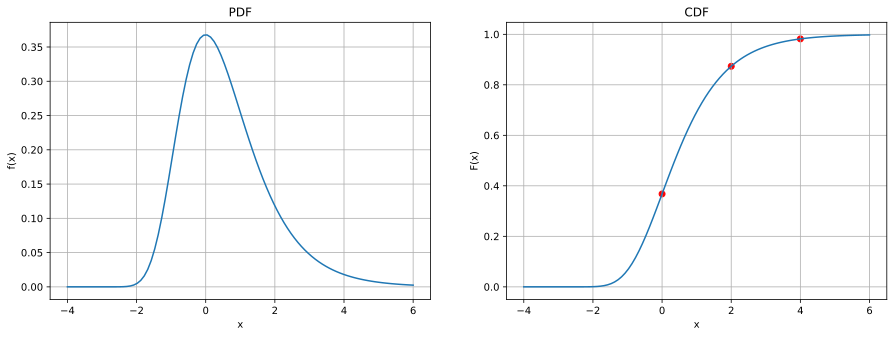

In [3]:
x = np.linspace(-4, 6, num=100)
y = f(x)
Y = F(x)

x_target = np.array([0, 2, 4])
Y_target = F(x_target)
print (Y_target)

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(x, y)
ax[1].plot(x, Y)
ax[1].scatter(x_target, Y_target, color='red')
ax[0].grid()
ax[1].grid()
ax[0].set_xlabel('x')
ax[1].set_xlabel('x')
ax[0].set_ylabel('f(x)')
ax[1].set_ylabel('F(x)')
ax[0].set_title('PDF')
ax[1].set_title('CDF')
plt.show()

The red dots in the CDF represent concrete points (x_target = [0, 2, 4]) where we will evaluate the CDF function value by numerical integration of the PDF.

Practically, we can start the integration from x=-4 rather than -inf.

First, Left Riemann integral:

In [4]:
Y1 = np.zeros(3)

nsteps = 10
dx = 10. / nsteps
for i in range(3):
    x_int = -4.
    while x_int < x_target[i]:
        Y1[i] += f(x_int) * dx
        x_int += dx
print(Y1)

[0.1839404  0.80646622 0.97204018]


Right Riemann integral:

In [5]:
Y1 = np.zeros(3)

for i in range(3):
    x_int = -4. + dx
    while x_int < x_target[i]+dx:
        Y1[i] += f(x_int) * dx
        x_int += dx
print(Y1)

[0.55181984 0.92467117 0.99002341]


Midpoint rule:

In [6]:
Y1 = np.zeros(3)

for i in range(3):
    x_int = -4.
    while x_int < x_target[i]:
        Y1[i] += f((x_int + x_int+dx)/2) * dx
        x_int += dx
print(Y1)

[0.3678114  0.87702222 0.98193753]


Trapezoidal rule:

In [7]:
Y1 = np.zeros(3)

for i in range(3):
    x_int = -4.
    while x_int < x_target[i]:
        Y1[i] += (f(x_int)+f(x_int+dx))/2 * dx
        x_int += dx
print(Y1)

[0.36788012 0.8655687  0.9810318 ]


Now, plot the entire CDF as obtained from numerical integration of the PDF (Trapezoidal rule), together with the analytical CDF

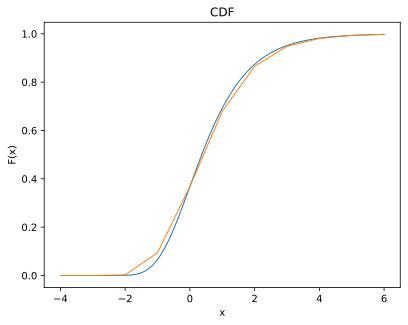

In [8]:
x1 = np.linspace(-4, 6, num=nsteps+1)
Y1 = np.zeros(nsteps+1)

for i in range(nsteps):
    Y1[i+1] = Y1[i] + (f(x1[i])+f(x1[i+1]))/2 * dx

plt.plot(x,Y, linewidth=1)
plt.plot(x1,Y1, linewidth=1)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('CDF')
plt.show()

Play with the number of steps (nsteps) to see how this number changes the accuracy of the numerical solution

## Part 2 Numerical Integration and differentiation of earthquake record

In this exercise we will apply numerical integration and numerical differentiation on given measurement data.
The data involves a velocity time series from earthquake recordings. In fact, the original earthquake records also include acceleration and displacement time series, but the purpose of this exercise is to calculate the displacement and acceleration from the given velocity by numerical integration and differentiation, respectively. Afterwards, the results are compared with the original data.

![seismograph](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Kinemetrics_seismograph.jpg/960px-Kinemetrics_seismograph.jpg)

Source: Wikimedia, Yamaguchi先生 (https://commons.wikimedia.org/wiki/File:Kinemetrics_seismograph.jpg), licensed under CC BY SA

Earthquake recordings are relevant as input signals to geotechnical and structural analysis to back-analyse or design structures for the (additional) forces and deformations that may occur during earthquakes. In a so-called one-dimensional site response analysis, geotechnical engineers can also predict whether soil liquefaction might happen at a project location if an earthquake would occur. Based on this they determine if or what measures need to be taken to improve the ground conditions.

Let's first download the datafiles

In [9]:
import os
from urllib.request import urlretrieve

In [10]:
data_files = ['Earthquake_velocity.txt', 'Earthquake_acceleration.txt', 'Earthquake_displacement.txt']

for filename in data_files:
    if not os.path.isfile(filename):
        print(f"Downloading {filename}...")
        urlretrieve('http://files.mude.citg.tudelft.nl/'+filename, filename)

Open the file 'Earthquake_velocity.txt' in a text editor (like VS code) to see how the content looks like. The file contains velocities that were recorded at a frequency of 200 per second during the event of an earthquake. Hence, the total duration of the earthquake measurements (in seconds) is the total number of readings divided by 200. 

Write the code to open the file and read the data (either line by line, or all at once). The data needs to be filtered and rearranged such that the velocities will appear sequentially in a one-dimensional array (v).
Also, create a one-dimensional array (t) containing the time values corresponding to the velocity readings.

In [11]:
def do_nothing():
    return

f = open("Earthquake_velocity.txt", 'r')
v = np.array([])
for i in range(9999):
    try: 
        line = f.readline()                         # at some point we will read beyond the end of the file
    except:
        do_nothing()
    else:
        values = np.fromstring(line, sep=' ')       # stores the values from each line in a temporary array
        if (len(values)>1):                         # to skip the first couple of lines with text
            v = np.append(v, values)                # adds the values to the v-array
num = len(v)
t = np.linspace(start=0, stop=num/200, num=num)

C:\Users\tomvanwoudenbe\AppData\Local\Temp\ipykernel_27572\2712711712.py:12: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  values = np.fromstring(line, sep=' ')       # stores the values from each line in a temporary array


Plot the velocity time series

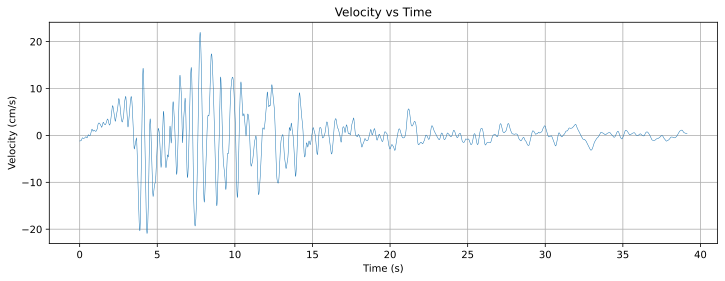

In [12]:
plt.figure(figsize=(12, 4))
plt.plot(t, v, linewidth=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (cm/s)')
plt.title('Velocity vs Time')
plt.grid(True)
plt.show()

### Displacement

First, we will integrate the velocity in time to displacement, to see what the maximum displacement is at the measurement point and how much permanent deformation it has undergone. Thereby we will use three numerical integration methods: Left Riemann, Right Riemann and Midpoint rule. At the end of this block, we will compare the results from the various methods with each other and with the displacement from the earthquake record.

Write the code for the Left Riemann sum:

In [13]:
d_LR = np.zeros([num])

for i in range(0,num-1):
    d_LR[i+1] = d_LR[i] + (t[i+1]-t[i]) * v[i]

Plot the displacement

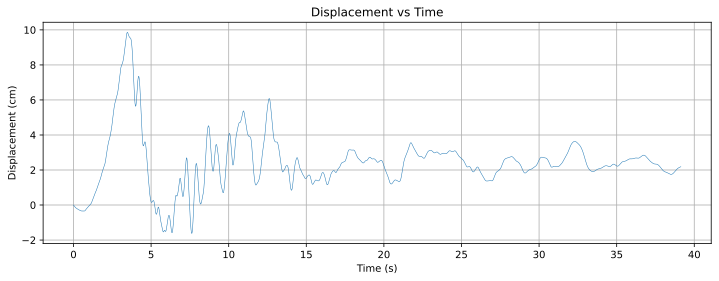

In [14]:
plt.figure(figsize=(12, 4))
plt.plot(t, d_LR, linewidth=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Displacement (cm)')
plt.title('Displacement vs Time')
plt.grid(True)
plt.show()

Write the code for the Right Riemann sum:

In [15]:
d_RR = np.zeros([num])

for i in range(1,num):
    d_RR[i] = d_RR[i-1] + (t[i]-t[i-1]) * v[i]

Plot the displacement

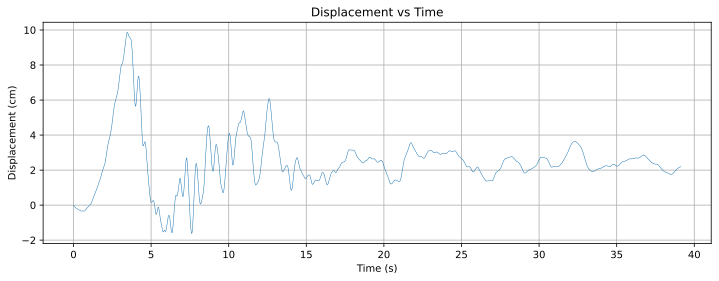

In [16]:
plt.figure(figsize=(12, 4))
plt.plot(t, d_RR, linewidth=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Displacement (cm)')
plt.title('Displacement vs Time')
plt.grid(True)
plt.show()

Write the code for the Midpoint rule:

In [17]:
d_MP = np.zeros([num])

for i in range(0,num-1):
    d_MP[i+1] = d_MP[i] + (t[i+1]-t[i]) * (v[i+1]+v[i])/2

Note that in this case, where data is given only at specific time intervals, and we simply interpolate the (unknown) velocity at the midpoints in the time interval, the Midpoint rule is exactly the same as the Trapezoidal rule. This is generally NOT the case when using a continuous non-linear function, since in general (f(x)+f(x+dx))/2 =not f(x+dx/2).

Plotting all together

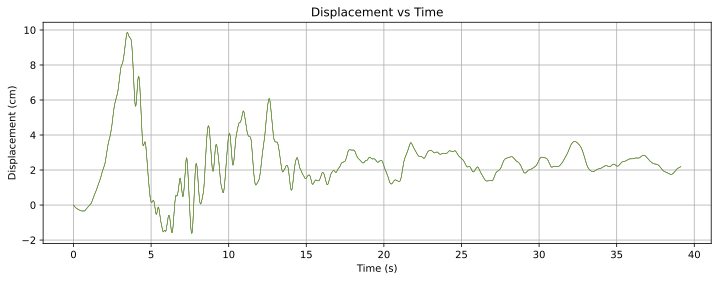

In [18]:
plt.figure(figsize=(12, 4))
plt.plot(t, d_LR, linewidth=0.5)
plt.plot(t, d_RR, linewidth=0.5)
plt.plot(t, d_MP, linewidth=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Displacement (cm)')
plt.title('Displacement vs Time')
plt.grid(True)
plt.show()

Since the measurements have a rather high sampling frequency, the results seem quite accurate and the differences between the integration methods are minimal in this case.

Open the 'Earthquake_displacement.txt' file and store the displacement data in a one-dimensional array (d_orig). Compare the calculated displacements with original displacement data.

In [19]:
f = open("Earthquake_displacement.txt", 'r')
d_orig = np.array([])
for i in range(9999):
    line = f.readline()                     # ??? Should we also use try-except-else here ???
    values = np.fromstring(line, sep=' ')
    if len(values)>1:
        d_orig = np.append(d_orig, values)

C:\Users\tomvanwoudenbe\AppData\Local\Temp\ipykernel_27572\1341713838.py:5: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  values = np.fromstring(line, sep=' ')


2.1873694646051765 2.195275474699725 2.1913224696524574 2.188


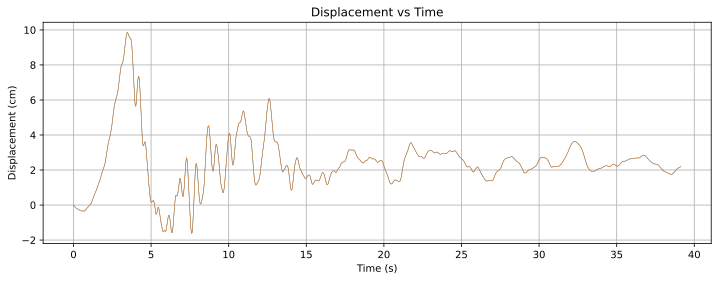

In [20]:
print(d_LR[-1], d_RR[-1], d_MP[-1], d_orig[-1])
plt.figure(figsize=(12, 4))
plt.plot(t, d_MP, linewidth=0.5)
plt.plot(t, d_orig, linewidth=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Displacement (cm)')
plt.title('Displacement vs Time')
plt.grid(True)
plt.show()

Conclude on the maximum displacement and the permanent displacement (although the measurement point has not yet come to a complete rest). You may round off your answers to integer values (zero decimals).

### Acceleration

Next, we will differentiate the velocity to acceleration, to see what the maximum acceleration is at the measurement point. Thereby we will use three numerical differentiation methods: Forward difference, Backward difference and Central difference. At the end of this block, we will compare our results with each other and with the acceleration from the earthquake record.

Write the code for the Forward difference method:

In [21]:
df_FD = np.zeros([num])

for i in range(0,num-1):
    df_FD[i] = (v[i+1]-v[i]) / (t[i+1]-t[i])

Plot the acceleration

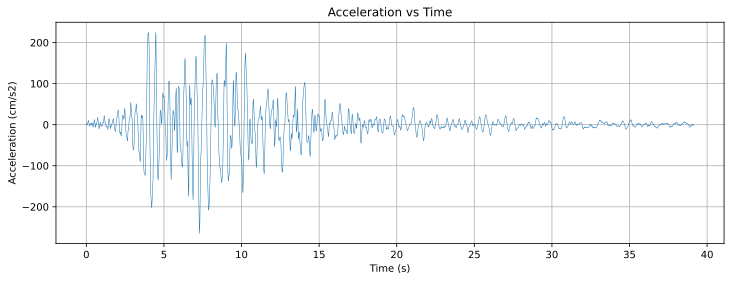

In [22]:
plt.figure(figsize=(12, 4))
plt.plot(t, df_FD, linewidth=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (cm/s2)')
plt.title('Acceleration vs Time')
plt.grid(True)
plt.show()

Write the code for the Backward difference method:

In [23]:
df_BD = np.zeros([num])

for i in range(1,num):
    df_BD[i] = (v[i]-v[i-1]) / (t[i]-t[i-1])

Plot the acceleration

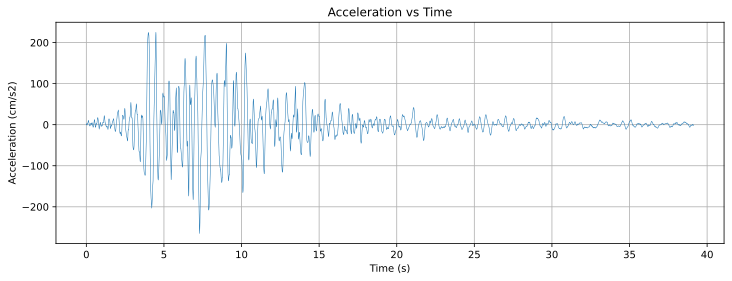

In [24]:
plt.figure(figsize=(12, 4))
plt.plot(t, df_BD, linewidth=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (cm/s2)')
plt.title('Acceleration vs Time')
plt.grid(True)
plt.show()

Write the code for the Central difference method:

In [25]:
df_CD = np.zeros([num])

for i in range(1,num-1):
    df_CD[i] = (v[i+1]-v[i-1]) / (t[i+1]-t[i-1])

Plotting all together:

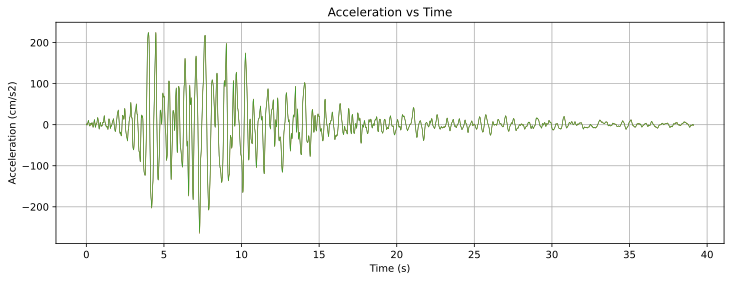

In [26]:
plt.figure(figsize=(12, 4))
plt.plot(t, df_FD, linewidth=0.5)
plt.plot(t, df_BD, linewidth=0.5)
plt.plot(t, df_CD, linewidth=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (cm/s2)')
plt.title('Acceleration vs Time')
plt.grid(True)
plt.show()

Again, the results seem quite accurate and the differences between the differentiation methods are minimal in this case, although the final values are notably different.

Compare with original data in the file 'Earthquake_acceleration.txt'
Open the 'Earthquake_acceleration.txt' file and store the acceleration data in a one-dimensional array (a_orig). Compare the calculated acceleration with original acceleration data.

In [27]:
f = open("Earthquake_acceleration.txt", 'r')
a_orig = np.array([])
for i in range(9999):
    line = f.readline()
    values = np.fromstring(line, sep=' ')
    if len(values)>1:
        a_orig = np.append(a_orig, values)

C:\Users\tomvanwoudenbe\AppData\Local\Temp\ipykernel_27572\3057944499.py:5: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  values = np.fromstring(line, sep=' ')


0.0 -1.1998466845539368 0.0 -0.99
-1.1998466845539368 -0.9998722371268599 -1.0998594608403274 -1.26


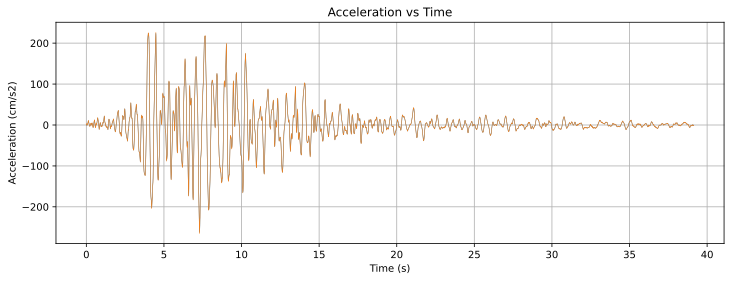

In [28]:
print(df_FD[-1], df_BD[-1], df_CD[-1], a_orig[-1])
print(df_FD[-2], df_BD[-2], df_CD[-2], a_orig[-2])
plt.figure(figsize=(12, 4))
plt.plot(t, df_CD, linewidth=0.5)
plt.plot(t, a_orig, linewidth=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (cm/s2)')
plt.title('Acceleration vs Time')
plt.grid(True)
plt.show()

Conclude on the maximum acceleration that the measurement point has undergone. You may round off to multitudes of 10 (cm/s2).

What time interval do you consider the 'heaviest' part of the earthquake?

# TEMPLATE BELOW 

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task x.x:}$
    
Run the cell below to load two dictionaries (objects) into the Python variable space, <code>m1</code> and <code>m2</code>. Some random math: $E = m \cdot c^2$. And

$$F = m \cdot a$$

You can run the code to check the key:value pairs.
    
</p>
</div>

In [29]:
# Provided code which is not to be edited by students
import numpy as np

In [ ]:
# The code given to students can be indicated with:
# with a cell tag `assignment`.
# These cells will be removed from the solution notebook.
# The assignment notebook will be generated after a push to main and
# will be stored on the branch `assignment`.
# Places where student should write their code are marked with `### YOUR CODE HERE ###` for filling in a single line
# or with `### YOUR CODE LINES HERE` for filling in multiple lines

import numpy as np

a = [### YOUR CODE HERE ###]
    
### YOUR CODE LINES HERE

print('First 20 fibonacci numbers:', ### YOUR CODE HERE ###)

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">

$\text{Solution x.x:}$

Having trouble understanding how the Gauss-Newton scheme works? Do you want to visualize how the parameters and model change on each iteration? Try uncommenting the cell below to create an interactive plot!

It is set up to visualize the model on each iteration. You can gain insight into the way convergence occurs by changing the value of <code>initial_guess_alternative</code> and rerunning the cell.
</p></div>

Cells containing a solution block (with color ` #FAE99E`) will be removed in the assignment notebook.

In [ ]:
# Solution code (in a separate cell) is indicated with
# a cell tag 'solution'.
# These cells will be removed from the assignment notebook.
# The assignment notebook will be generated after a push to main and
# will be stored on the branch `solution`.

a = [0,2]

for i in range(2, 20):
    a.append(a[i-1] + a[i-2])

print('First 20 fibonacci numbers:', a)

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>
End of solution.
</p>
</div>

Cells containing a solution block (with color ` #FAE99E`) will be removed in the assignment notebook.

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%"> <p>

$\text{Tip:}$

Don't use the CSS danger/warning blocks because they don't display when converting to HTML with pandoc (won't display right on course files on website).
</p></div>

<div style="margin-top: 50px; padding-top: 20px; border-top: 1px solid #ccc;">
  <div style="display: flex; justify-content: flex-end; gap: 20px; align-items: center;">
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="width:88px; height:auto;" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
  </div>
  <div style="font-size: 75%; margin-top: 10px; text-align: right;">
    &copy; Copyright 2025 <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE</a> TU Delft. 
    This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0 License</a>. It contains CC BY SA content.
  </div>
</div>